In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
# Loading the dataset
df = pd.read_csv('tennis_stats.csv')
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [3]:
df.shape

(1721, 24)

In [4]:
df.dtypes

Player                         object
Year                            int64
FirstServe                    float64
FirstServePointsWon           float64
FirstServeReturnPointsWon     float64
SecondServePointsWon          float64
SecondServeReturnPointsWon    float64
Aces                            int64
BreakPointsConverted          float64
BreakPointsFaced                int64
BreakPointsOpportunities        int64
BreakPointsSaved              float64
DoubleFaults                    int64
ReturnGamesPlayed               int64
ReturnGamesWon                float64
ReturnPointsWon               float64
ServiceGamesPlayed              int64
ServiceGamesWon               float64
TotalPointsWon                float64
TotalServicePointsWon         float64
Wins                            int64
Losses                          int64
Winnings                        int64
Ranking                         int64
dtype: object

In [5]:
df.drop(['Player','Year'],axis=1,inplace=True)

In [6]:
df.head()

,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,0.88,0.50,0.38,0.50,0.39,0,0.14,7,7,0.43,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,0.84,0.62,0.26,0.33,0.07,7,0.00,7,0,0.57,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,0.83,0.60,0.28,0.53,0.44,2,0.38,10,8,0.40,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,0.83,0.64,0.34,0.59,0.33,2,0.33,5,6,0.40,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,0.81,0.54,0.00,0.33,0.33,1,0.00,2,0,0.50,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [7]:
# percentage of missing values in each column
round(100*(df.isnull().sum()/len(df)),2).sort_values(ascending = False)

Ranking                       0.0
Winnings                      0.0
FirstServePointsWon           0.0
FirstServeReturnPointsWon     0.0
SecondServePointsWon          0.0
SecondServeReturnPointsWon    0.0
Aces                          0.0
BreakPointsConverted          0.0
BreakPointsFaced              0.0
BreakPointsOpportunities      0.0
BreakPointsSaved              0.0
DoubleFaults                  0.0
ReturnGamesPlayed             0.0
ReturnGamesWon                0.0
ReturnPointsWon               0.0
ServiceGamesPlayed            0.0
ServiceGamesWon               0.0
TotalPointsWon                0.0
TotalServicePointsWon         0.0
Wins                          0.0
Losses                        0.0
FirstServe                    0.0
dtype: float64

In [8]:
# insert win-loss ratio
df['Win-Loss Ratio'] = df.apply(lambda r : float(r.Wins) / r.Losses if r.Losses > 0 else 0, axis = 1)

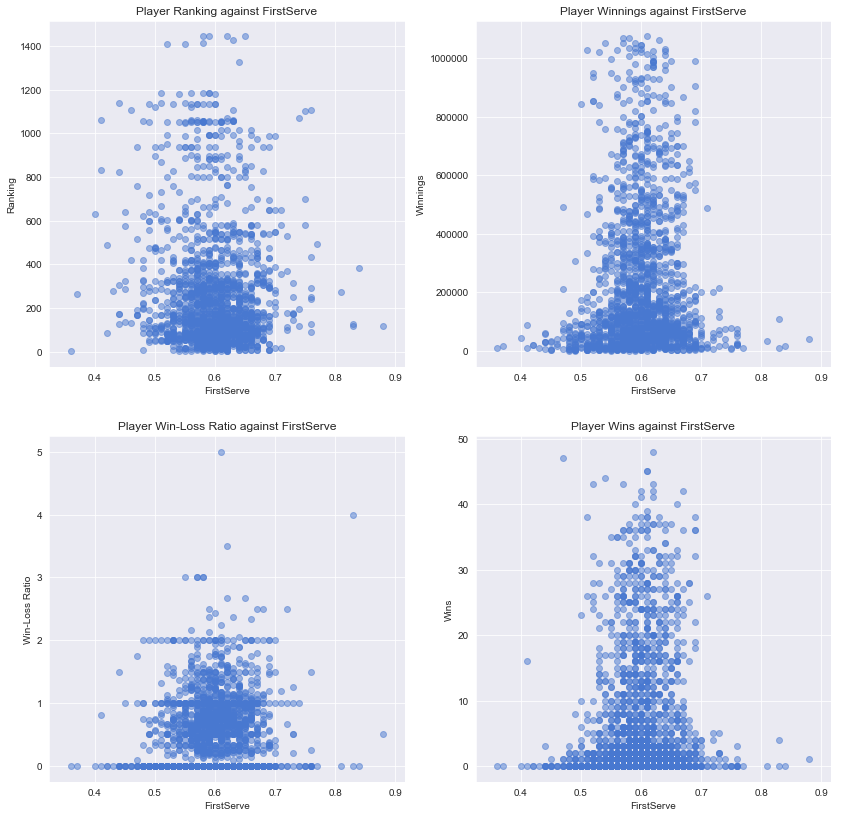

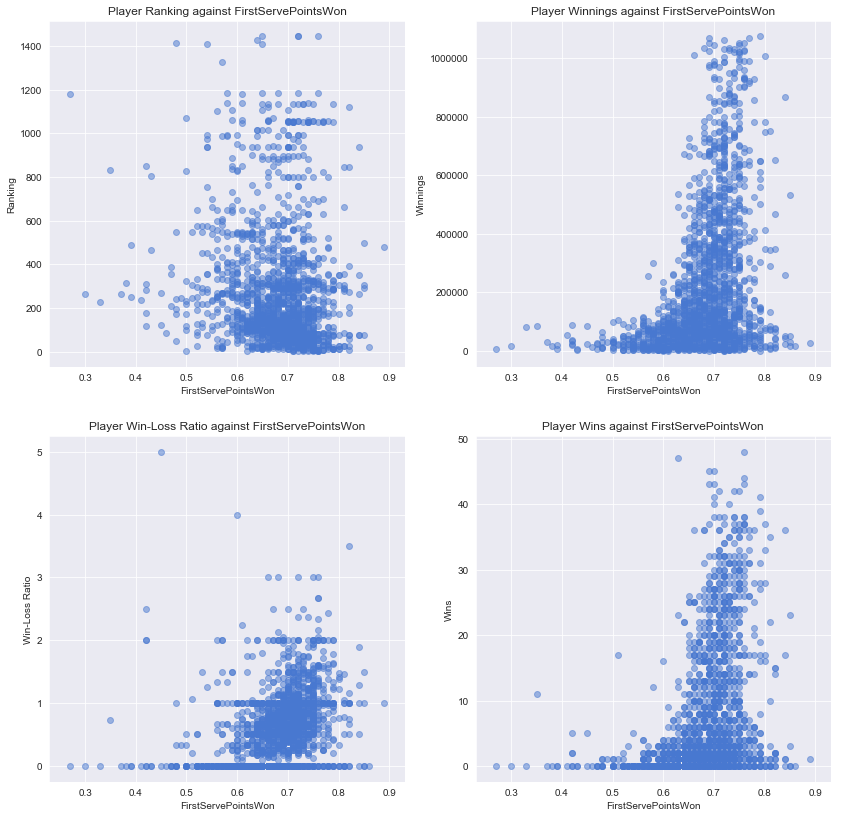

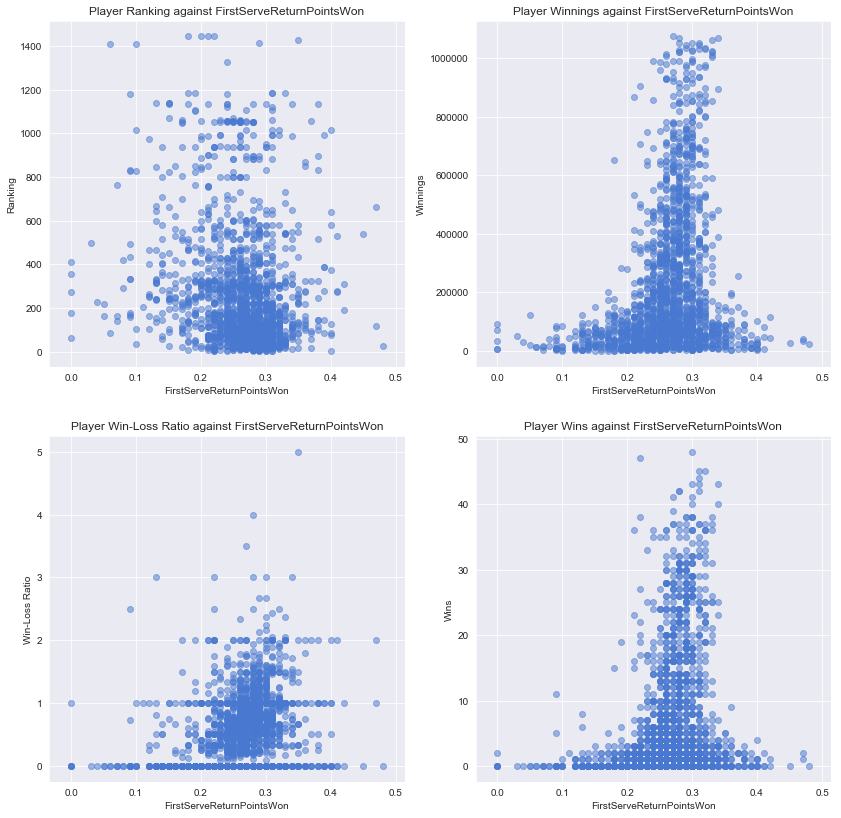

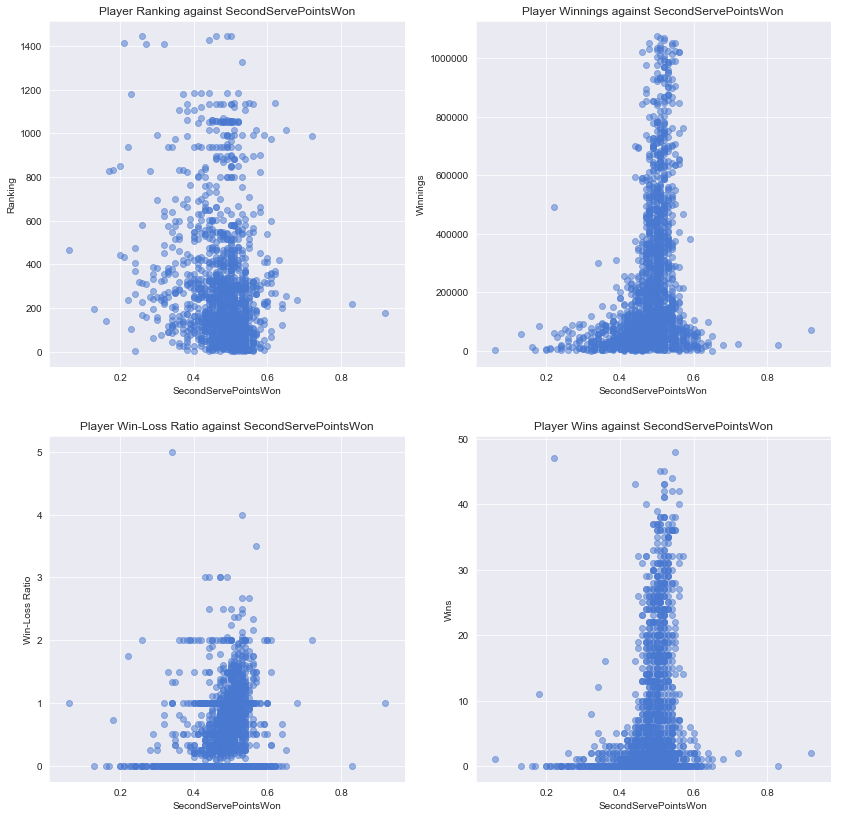

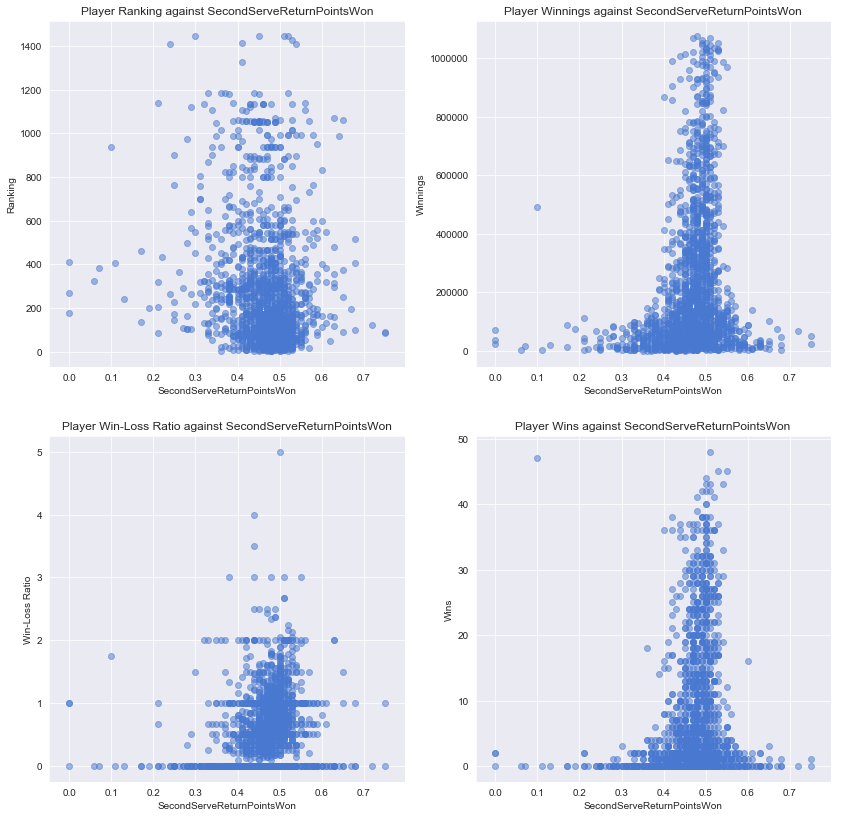

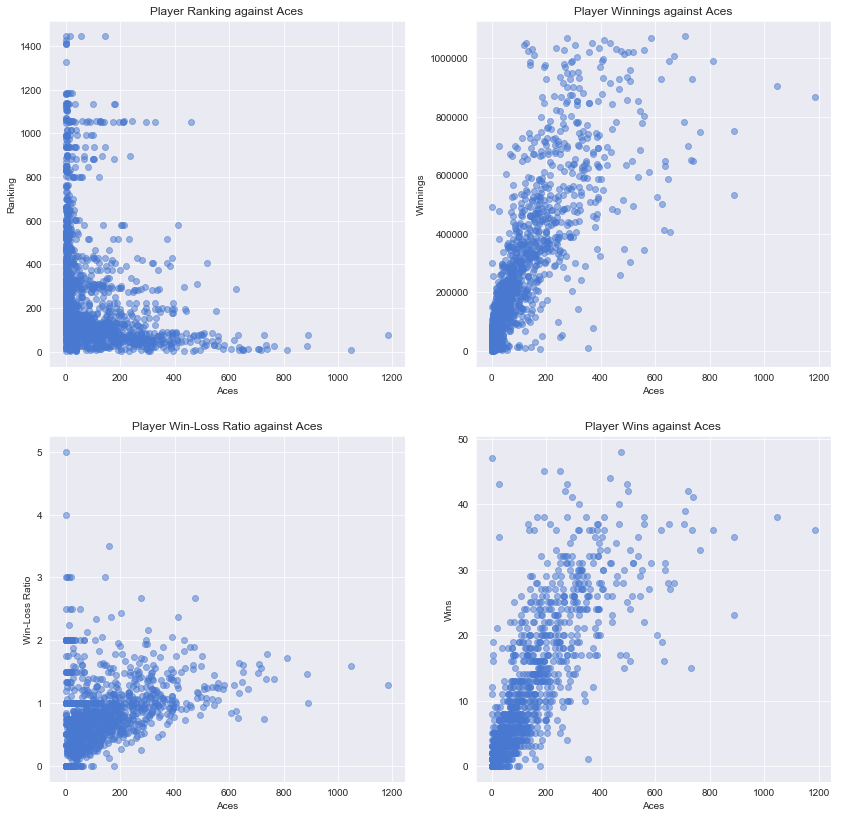

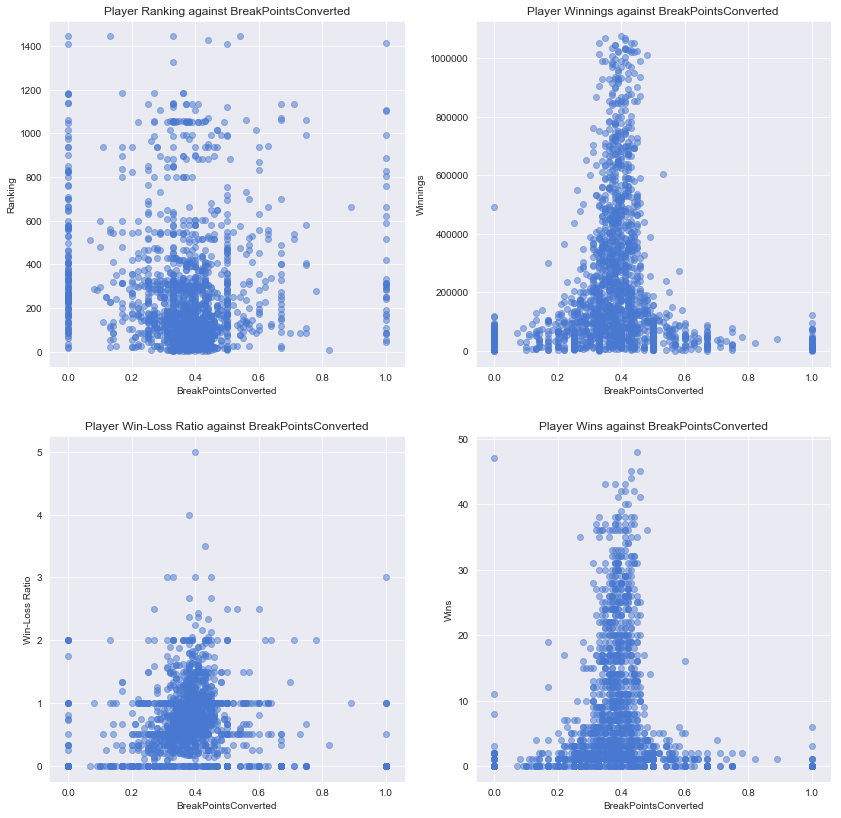

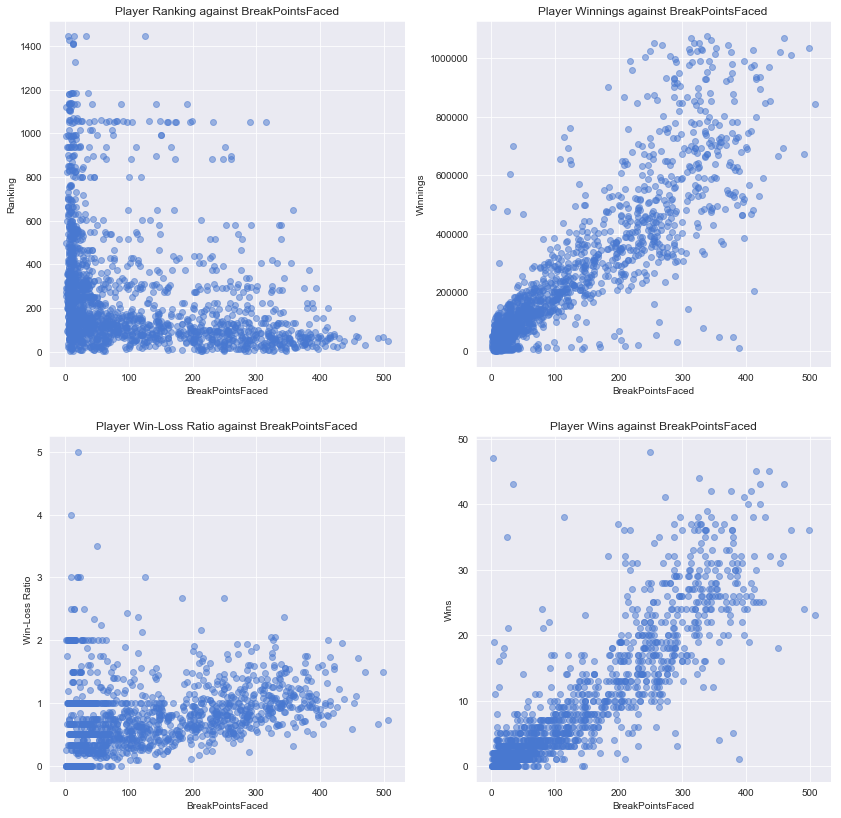

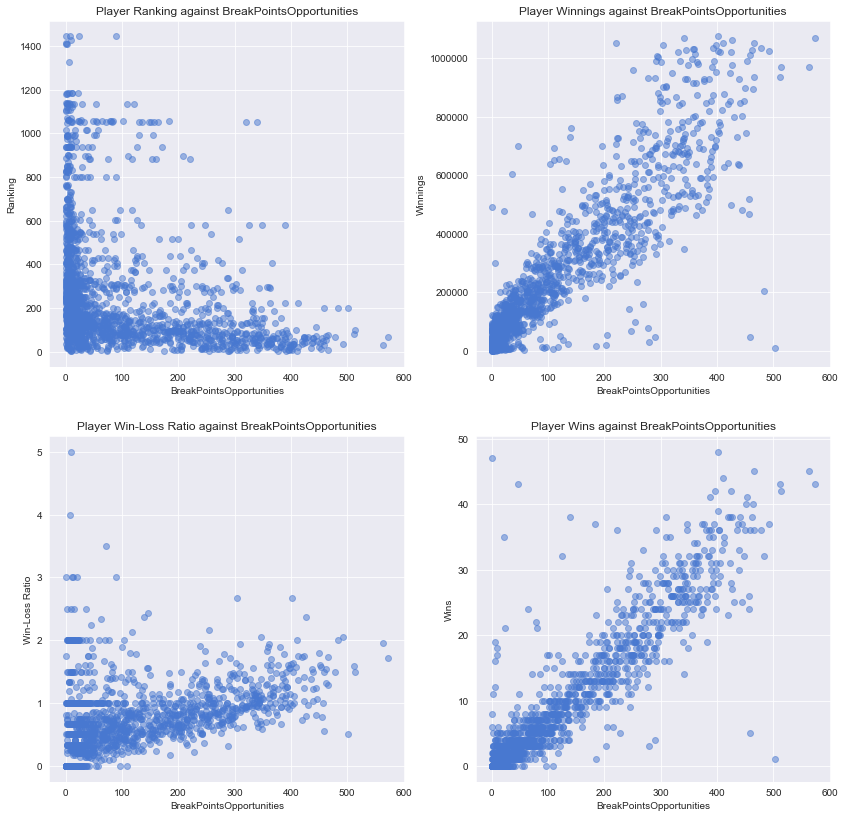

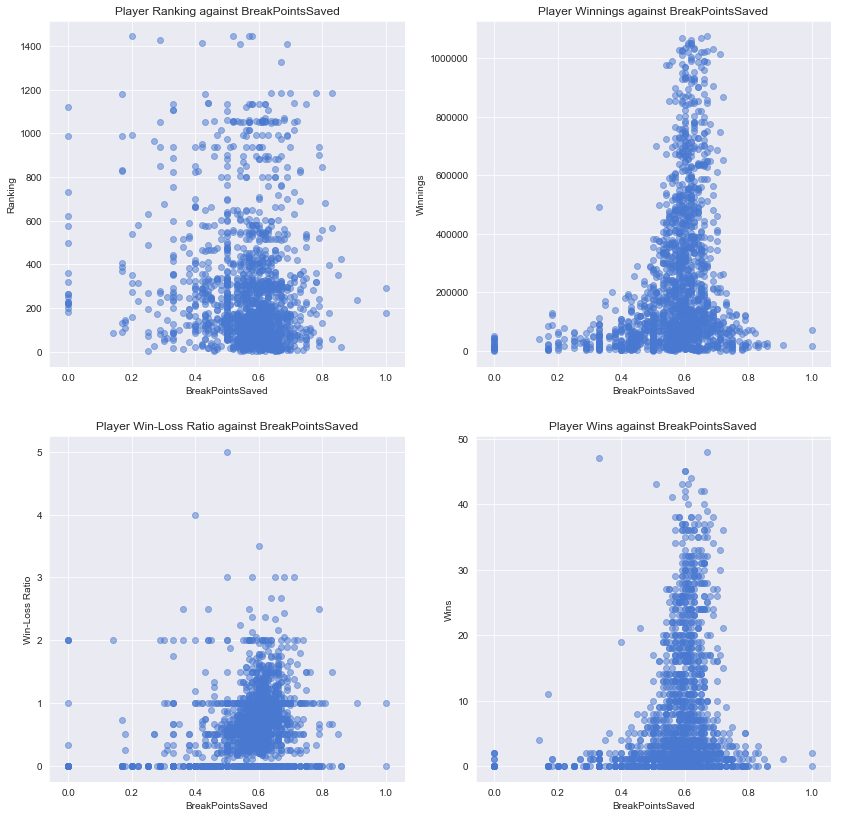

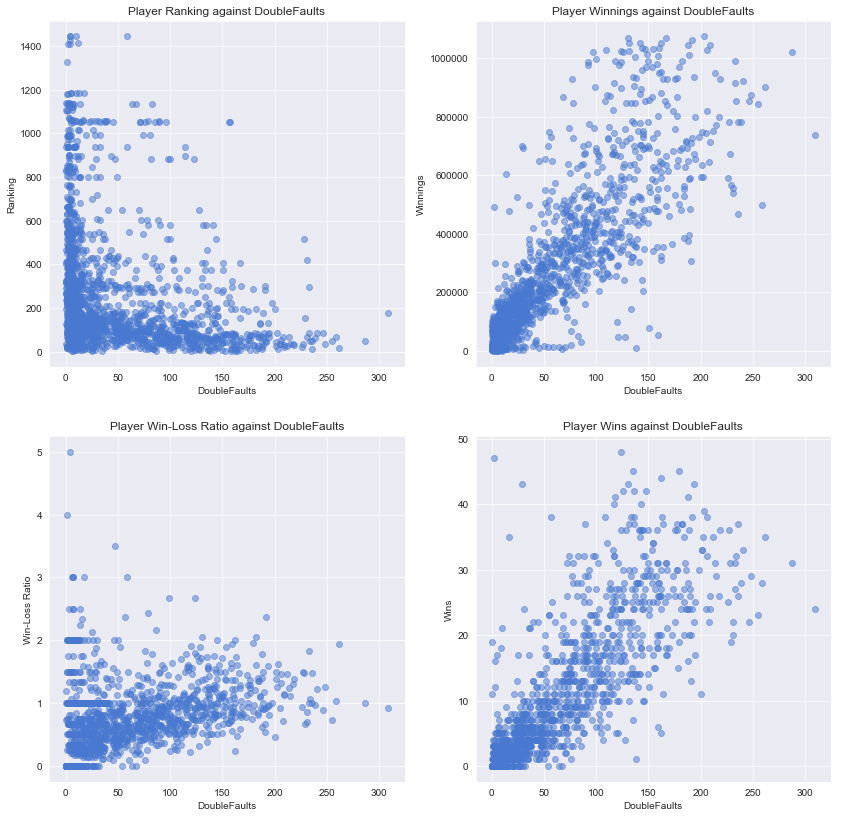

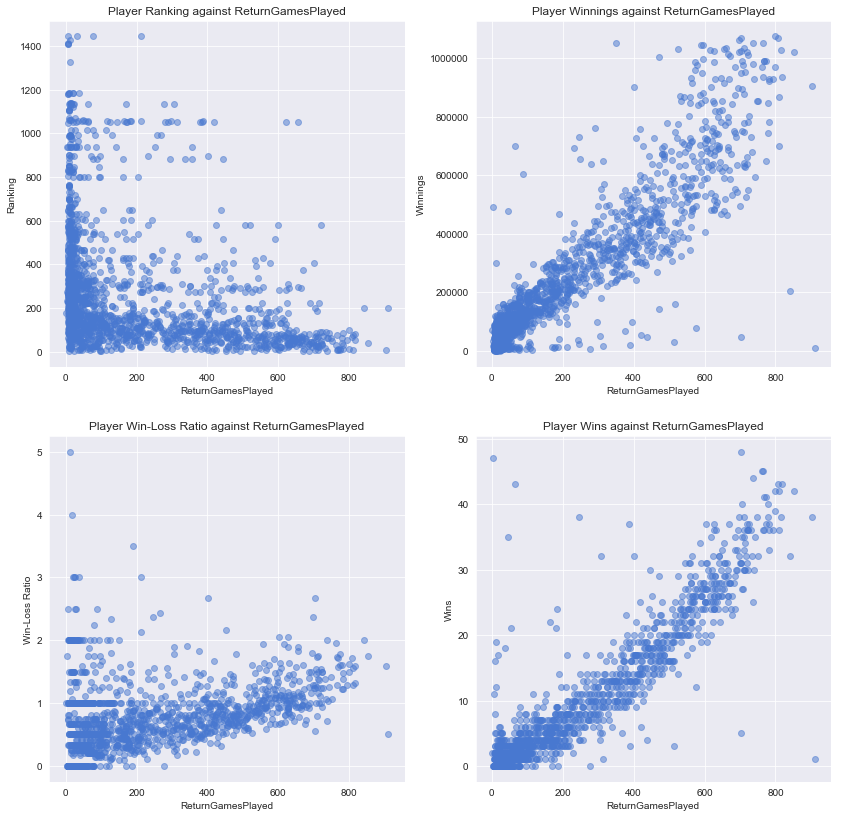

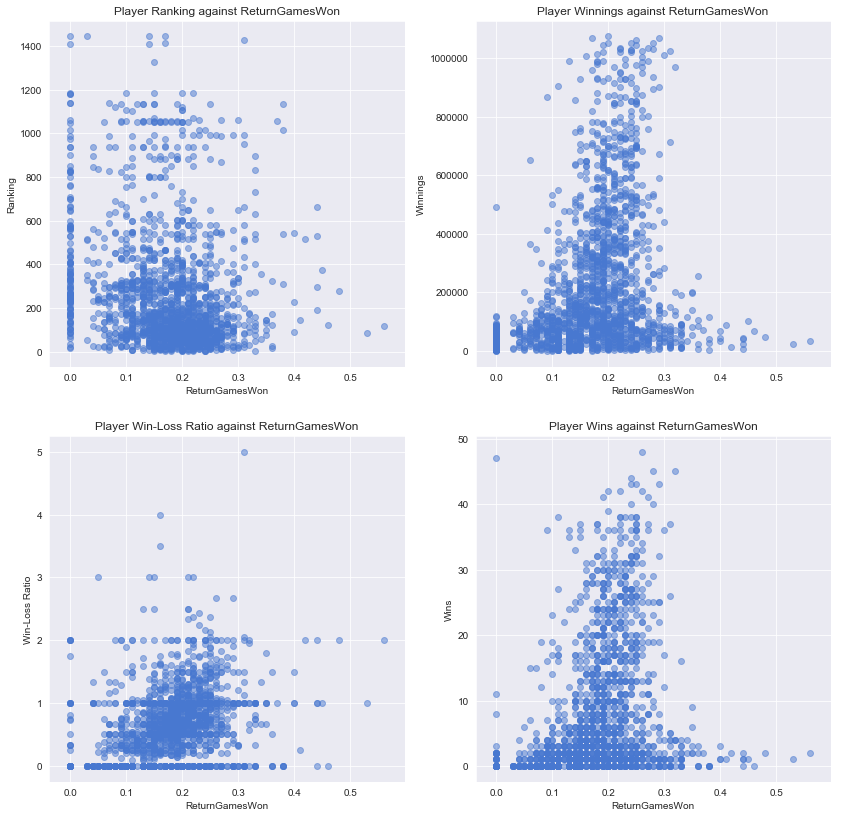

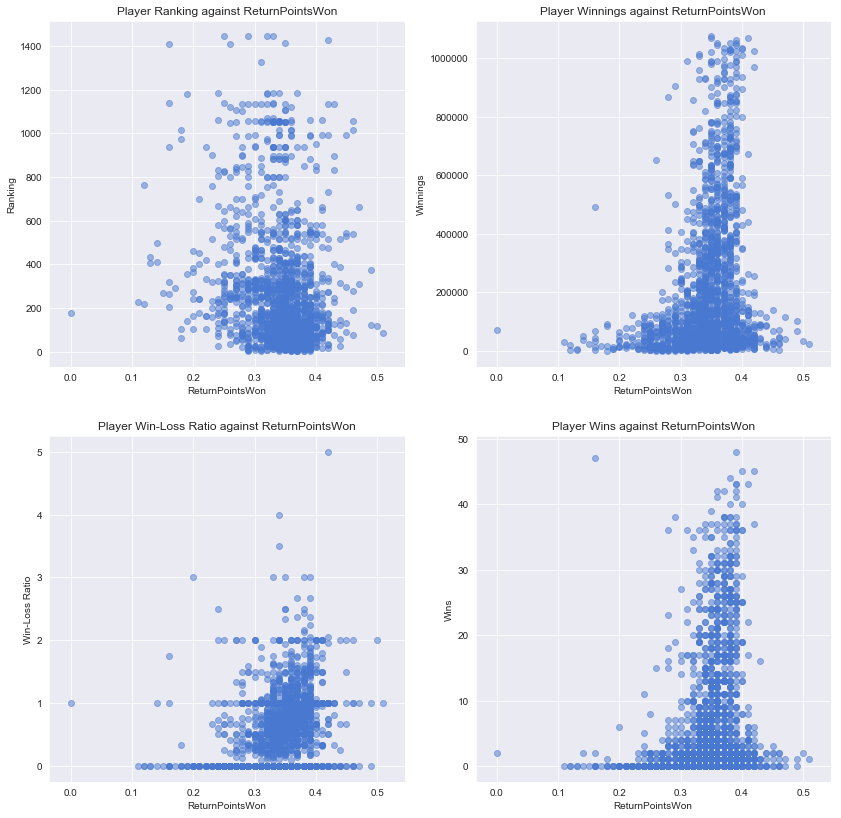

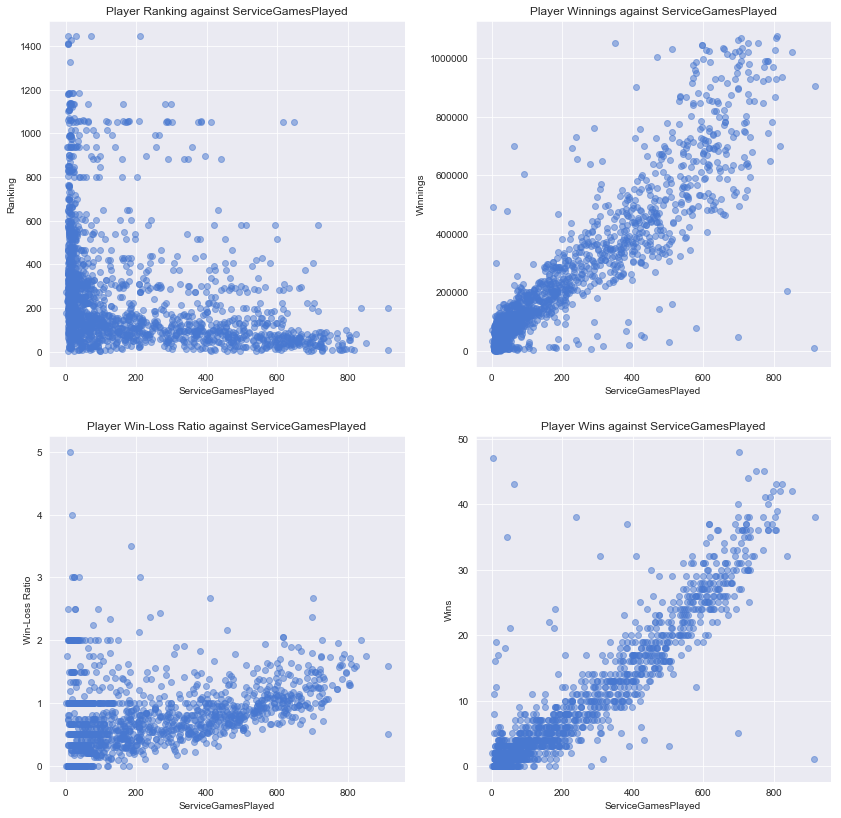

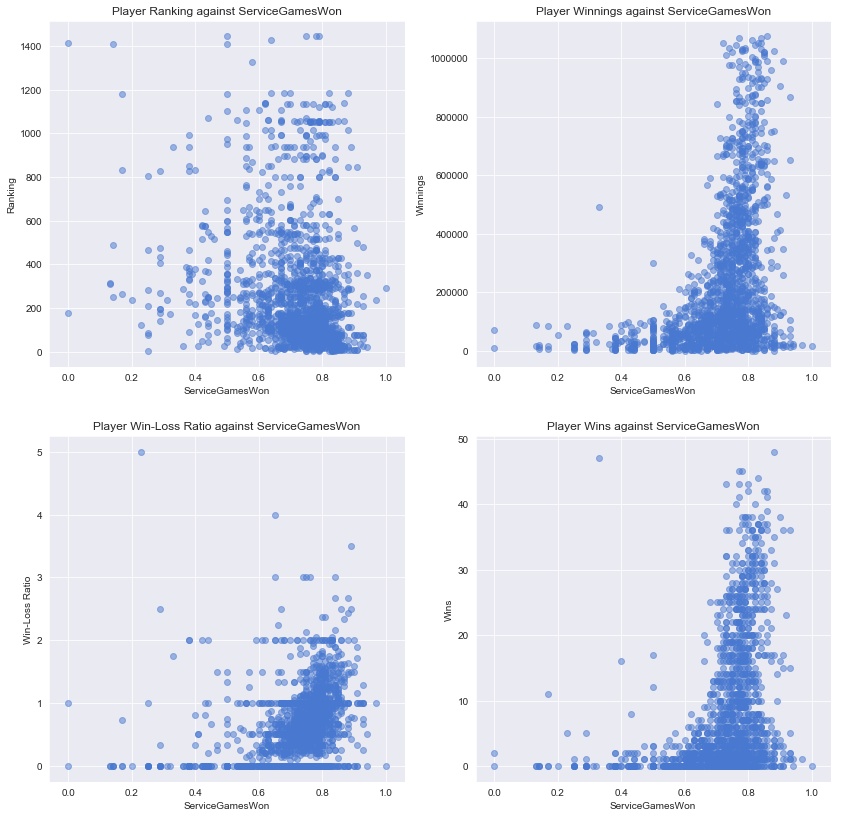

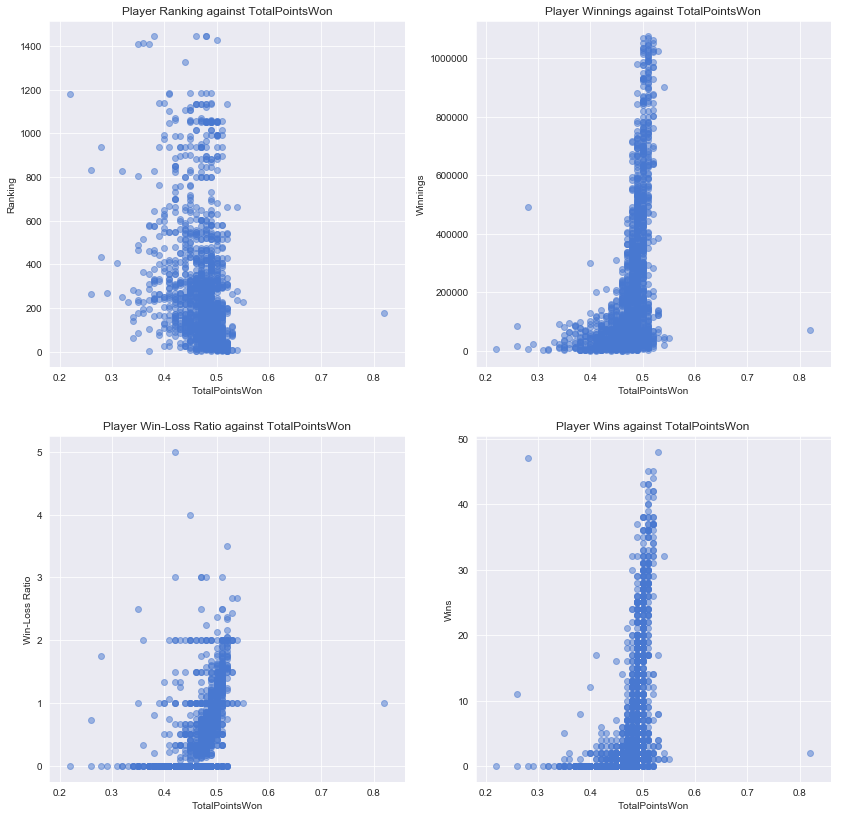

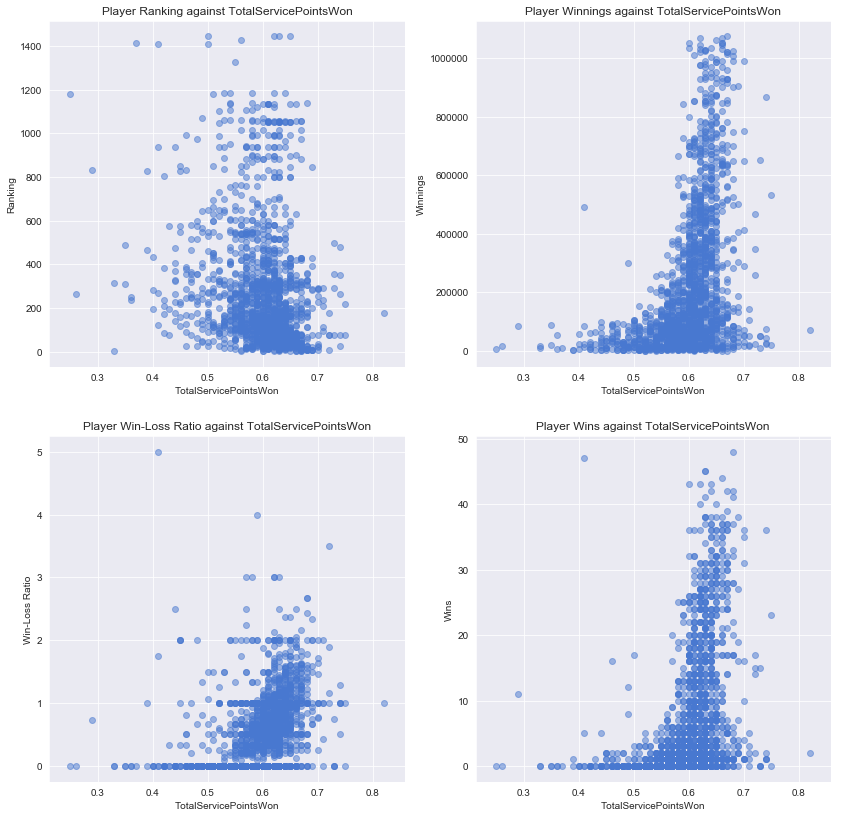

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,5)
PlayerID = ['Player','Year']
Variables = ['FirstServe','FirstServePointsWon',
 'FirstServeReturnPointsWon','SecondServePointsWon',
 'SecondServeReturnPointsWon','Aces','BreakPointsConverted',
 'BreakPointsFaced','BreakPointsOpportunities','BreakPointsSaved',
 'DoubleFaults','ReturnGamesPlayed','ReturnGamesWon','ReturnPointsWon',
 'ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
 'TotalServicePointsWon']
PerformanceIndicators = ['Wins','Winnings','Ranking']

for var in Variables:
    sns.set_style('darkgrid')
    sns.set_palette('muted')
    
    plt.subplots(2,2,figsize=(14,14))
# RANKING
    ax = plt.subplot(2, 2, 1)
    ax.scatter(df[var],df.Ranking,alpha = 0.5)
    ax.set_xlabel(var)
    ax.set_ylabel("Ranking")
    ax.set_title("Player Ranking against {}".format(var)) 
 # WINNINGS
    ax2 = plt.subplot(2, 2, 2)
    ax2.scatter(df[var],df.Winnings,alpha = 0.5)
    ax2.set_xlabel(var)
    ax2.set_ylabel("Winnings")
    ax2.set_title("Player Winnings against {}".format(var))
 # WIN-LOSS RATIO
    ax3 = plt.subplot(2, 2, 3)
    ax3.scatter(df[var],df['Win-Loss Ratio'],alpha = 0.5)
    ax3.set_xlabel(var)
    ax3.set_ylabel('Win-Loss Ratio')
    ax3.set_title("Player Win-Loss Ratio against {}".format(var))
 # WINS
    ax4 = plt.subplot(2, 2, 4)
    ax4.scatter(df[var],df.Wins,alpha = 0.5)
    ax4.set_xlabel(var)
    ax4.set_ylabel('Wins')
    ax4.set_title("Player Wins against {}".format(var))
    
    plt.show()

In [10]:
# desired dataset creation
df_offensive = df[['Aces', 'DoubleFaults', 'FirstServe', 'FirstServePointsWon', 'SecondServePointsWon', 'BreakPointsFaced', 'BreakPointsSaved', 'ServiceGamesPlayed', 'ServiceGamesWon', 'TotalServicePointsWon']]
df_defensive = df[['FirstServeReturnPointsWon', 'SecondServeReturnPointsWon', 'BreakPointsOpportunities', 'BreakPointsConverted', 'ReturnGamesPlayed', 'ReturnGamesWon', 'ReturnPointsWon', 'TotalPointsWon']]
df_wins = df['Wins'].values
df_losses = df['Losses'].values
df_winnings = df['Winnings'].values
df_rankings = df['Ranking'].values

In [11]:
# splitting of dataset
msk = np.random.rand(len(df)) < 0.8

df_offensive_train = df_offensive[msk]
df_offensive_val = df_offensive[~msk]

df_defensive_train = df_defensive[msk]
df_defensive_val = df_defensive[~msk]

df_wins_train = df_wins[msk]
df_wins_val = df_wins[~msk]

df_losses_train = df_losses[msk]
df_losses_val = df_losses[~msk]

df_winnings_train = df_winnings[msk]
df_winnings_val = df_winnings[~msk]

df_rankings_train = df_rankings[msk]
df_rankings_val = df_rankings[~msk]



print("train shape: ",df_offensive_train.shape, " ",df_defensive_train.shape, " ", df_wins_train.shape, " ",
      df_losses_train.shape, " ", df_winnings_train.shape, " ",df_rankings_train.shape)

print("validation shape :",df_offensive_val.shape, " ",df_defensive_val.shape, " ", df_wins_val.shape, " ",
      df_losses_val.shape, " ", df_winnings_val.shape, " ",df_rankings_val.shape)

train shape:  (1399, 10)   (1399, 8)   (1399,)   (1399,)   (1399,)   (1399,)
validation shape : (322, 10)   (322, 8)   (322,)   (322,)   (322,)   (322,)


In [12]:
from sklearn.linear_model import LinearRegression
def evaluate(category, test_labels, test_pred):
    errors = abs(test_pred - test_labels)
    print(category,'Model Performance')
    print('MAE:',mean_absolute_error(test_labels,test_pred))
    print('MSE:', mean_squared_error(test_labels,test_pred))
    print('RMSE:', np.sqrt(mean_squared_error(test_labels,test_pred)))
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))

# Plot Datapoints
def plot(x_test, y_test, y_pred, Indicator, reg):
    sns.set_style('darkgrid')
    sns.set_palette('muted')
    ax = plt.subplot()
    plt.scatter(y_test,y_pred,alpha = 0.5)
    ax.set_xlabel('{} Test Values'.format(Indicator))
    ax.set_ylabel('{} Predicted Values'.format(Indicator))
    ax.set_title("Optimised Test vs. Predicted Values for {I} in Tennis\nTest score: {S}".format(I = Indicator,S = reg.score(x_test, y_test)))
    plt.savefig("Optimised Test vs. Predicted Values for {} in Tennis.png".format(Indicator))
    plt.show()
    

Offensive Wins Model Performance
MAE: 2.104168881103261
MSE: 11.630264099814953
RMSE: 3.410317301925871
Average Error: 2.1042 degrees.
Train Score: 0.8666493582028095
Test Score: 1.0


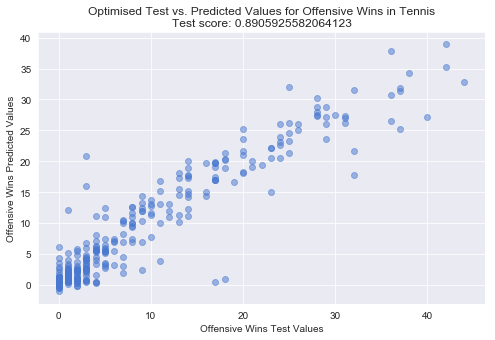

In [13]:
regressor_wins_offensive = LinearRegression()
regressor_wins_offensive.fit(df_offensive_train, df_wins_train)
df_wins_offensive_pred = regressor_wins_offensive.predict(df_offensive_val)
evaluate("Offensive Wins", df_wins_val, df_wins_offensive_pred)
print('Train Score:', regressor_wins_offensive.score(df_offensive_train, df_wins_train))
print('Test Score:', regressor_wins_offensive.score(df_offensive_val, df_wins_offensive_pred))
plot(df_offensive_val, df_wins_val, df_wins_offensive_pred, 'Offensive Wins', regressor_wins_offensive)

Offensive Losses Model Performance
MAE: 2.0024749354174114
MSE: 8.94746685437577
RMSE: 2.991231661770076
Average Error: 2.0025 degrees.
Train Score: 0.8975239947494908
Test Score: 1.0


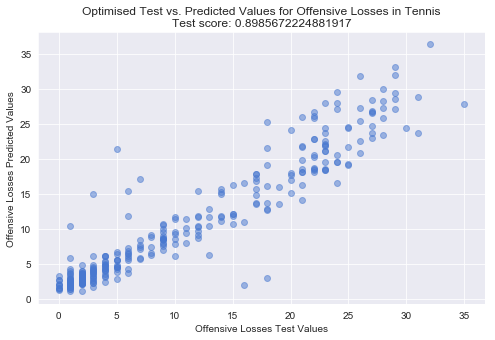

In [14]:
regressor_losses_offensive = LinearRegression()
regressor_losses_offensive.fit(df_offensive_train, df_losses_train)
df_losses_offensive_pred = regressor_losses_offensive.predict(df_offensive_val)
evaluate("Offensive Losses", df_losses_val, df_losses_offensive_pred)
print('Train Score:', regressor_losses_offensive.score(df_offensive_train, df_losses_train))
print('Test Score:', regressor_losses_offensive.score(df_offensive_val, df_losses_offensive_pred))
plot(df_offensive_val, df_losses_val, df_losses_offensive_pred, 'Offensive Losses', regressor_losses_offensive)

Offensive Winnings Model Performance
MAE: 63984.45598292714
MSE: 9651312936.372374
RMSE: 98241.09596483731
Average Error: 63984.4560 degrees.
Train Score: 0.8327238237918423
Test Score: 1.0


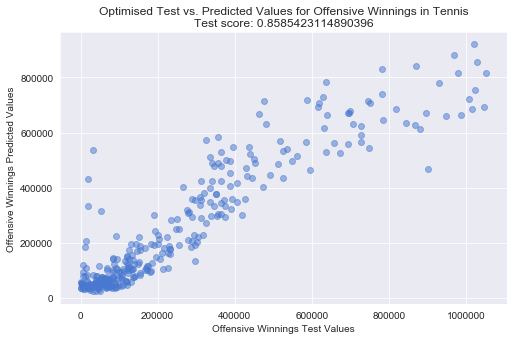

In [15]:
regressor_winnings_offensive = LinearRegression()
regressor_winnings_offensive.fit(df_offensive_train, df_winnings_train)
df_winnings_offensive_pred = regressor_winnings_offensive.predict(df_offensive_val)
evaluate("Offensive Winnings", df_winnings_val, df_winnings_offensive_pred)
print('Train Score:', regressor_winnings_offensive.score(df_offensive_train, df_winnings_train))
print('Test Score:', regressor_winnings_offensive.score(df_offensive_val, df_winnings_offensive_pred))
plot(df_offensive_val, df_winnings_val, df_winnings_offensive_pred, 'Offensive Winnings', regressor_winnings_offensive)

Offensive Rankings Model Performance
MAE: 179.11210869735396
MSE: 63123.3019271424
RMSE: 251.24351121400608
Average Error: 179.1121 degrees.
Train Score: 0.12647244836162574
Test Score: 1.0


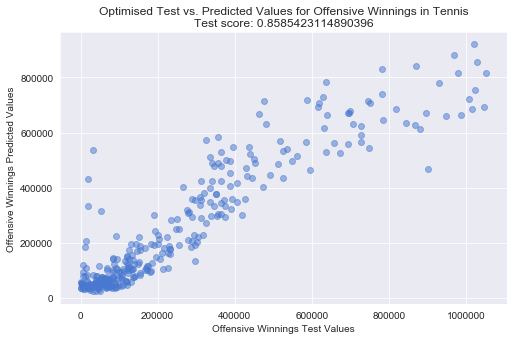

In [16]:
regressor_rankings_offensive = LinearRegression()
regressor_rankings_offensive.fit(df_offensive_train, df_rankings_train)
df_rankings_offensive_pred = regressor_rankings_offensive.predict(df_offensive_val)
evaluate("Offensive Rankings", df_rankings_val, df_rankings_offensive_pred)
print('Train Score:', regressor_rankings_offensive.score(df_offensive_train, df_rankings_train))
print('Test Score:', regressor_rankings_offensive.score(df_offensive_val, df_rankings_offensive_pred))
plot(df_offensive_val, df_winnings_val, df_winnings_offensive_pred, 'Offensive Winnings', regressor_winnings_offensive)

Defensive Wins Model Performance
MAE: 2.1862582908077637
MSE: 12.128963958936183
RMSE: 3.4826662141147238
Average Error: 2.1863 degrees.
Train Score: 0.8630873020970458
Test Score: 1.0


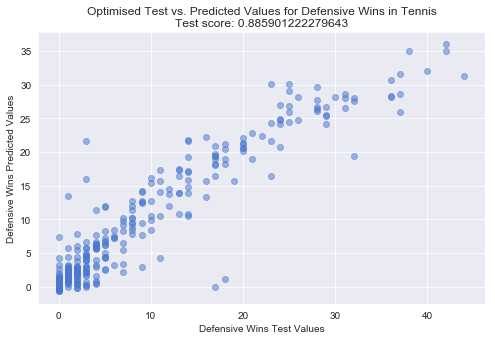

In [17]:
regressor_wins_defensive = LinearRegression()
regressor_wins_defensive.fit(df_defensive_train, df_wins_train)
df_wins_defensive_pred = regressor_wins_defensive.predict(df_defensive_val)
evaluate("Defensive Wins", df_wins_val, df_wins_defensive_pred)
print('Train Score:', regressor_wins_defensive.score(df_defensive_train, df_wins_train))
print('Test Score:', regressor_wins_defensive.score(df_defensive_val, df_wins_defensive_pred))
plot(df_defensive_val, df_wins_val, df_wins_defensive_pred, 'Defensive Wins', regressor_wins_defensive)

Defensive Losses Model Performance
MAE: 2.195005465694146
MSE: 10.39097562650028
RMSE: 3.2235036259480583
Average Error: 2.1950 degrees.
Train Score: 0.8799021479790928
Test Score: 1.0


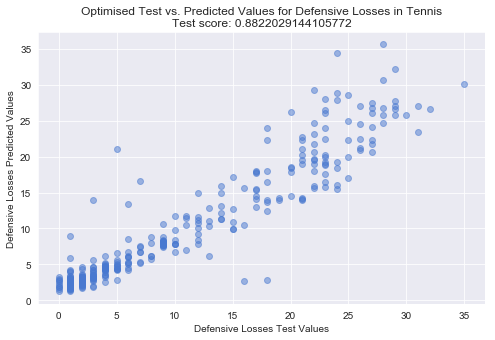

In [18]:
regressor_losses_defensive = LinearRegression()
regressor_losses_defensive.fit(df_defensive_train, df_losses_train)
df_losses_defensive_pred = regressor_losses_defensive.predict(df_defensive_val)
evaluate("Defensive Losses", df_losses_val, df_losses_defensive_pred)
print('Train Score:', regressor_losses_defensive.score(df_defensive_train, df_losses_train))
print('Test Score:', regressor_losses_defensive.score(df_defensive_val, df_losses_defensive_pred))
plot(df_defensive_val, df_losses_val, df_losses_defensive_pred, 'Defensive Losses', regressor_losses_defensive)

Defensive Winnings Model Performance
MAE: 64932.28164902519
MSE: 10023117125.422647
RMSE: 100115.5189040273
Average Error: 64932.2816 degrees.
Train Score: 0.8295802172756369
Test Score: 1.0


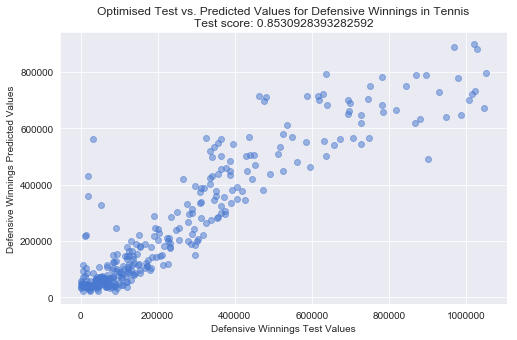

In [19]:
regressor_winnings_defensive = LinearRegression()
regressor_winnings_defensive.fit(df_defensive_train, df_winnings_train)
df_winnings_defensive_pred = regressor_winnings_defensive.predict(df_defensive_val)
evaluate("Defensive Winnings", df_winnings_val, df_winnings_defensive_pred)
print('Train Score:', regressor_winnings_defensive.score(df_defensive_train, df_winnings_train))
print('Test Score:', regressor_winnings_defensive.score(df_defensive_val, df_winnings_defensive_pred))
plot(df_defensive_val, df_winnings_val, df_winnings_defensive_pred, 'Defensive Winnings', regressor_winnings_defensive)

Defensive Rankings Model Performance
MAE: 177.9477619148103
MSE: 62900.45478736107
RMSE: 250.79963075603015
Average Error: 177.9478 degrees.
Train Score: 0.13851103681119337
Test Score: 1.0


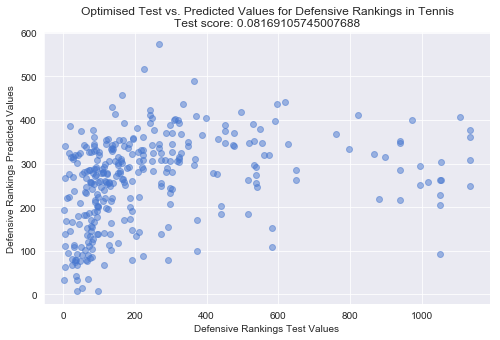

In [20]:
regressor_rankings_defensive = LinearRegression()
regressor_rankings_defensive.fit(df_defensive_train, df_rankings_train)
df_rankings_defensive_pred = regressor_rankings_defensive.predict(df_defensive_val)
evaluate("Defensive Rankings", df_rankings_val, df_rankings_defensive_pred)
print('Train Score:', regressor_rankings_defensive.score(df_defensive_train, df_rankings_train))
print('Test Score:', regressor_rankings_defensive.score(df_defensive_val, df_rankings_defensive_pred))
plot(df_defensive_val, df_rankings_val, df_rankings_defensive_pred, 'Defensive Rankings', regressor_rankings_defensive)